In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [882]:
df = pd.read_csv("train.csv")

In [883]:
df.head()

,gender,full_name,year_of_birth,weight,height,eye_color,race,accommodation_type,education_status,blood_type,...,owns_a_pet,has_health_insurance,has_cancer,smokes,has_alzheimers,facial_hair,daily_household_water_usage,diet_type,fast_food_meals_per_month,infected
0,male,Gerald Valentine,2024,8.69,52.32,brown,black,apartment,not_applicable,A+,...,no,no,no,no,no,none,1471.95,regular,2,0
1,male,Chad Sell,1956,93.21,157.04,brown,asian,villa,associate_degree,AB+,...,no,no,no,no,no,short,1969.39,regular,0,0
2,male,Alex Crawford,1949,83.79,187.70,brown,white,apartment,associate_degree,B+,...,yes,no,no,no,yes,none,366.43,regular,16,0
3,female,Mildred Valentine,1992,90.29,159.20,brown,middle_eastern,apartment,high_school,O+,...,yes,yes,no,no,no,none,1548.20,regular,1,1
4,male,Francisco Hill,2013,40.23,96.61,brown,asian,apartment,not_applicable,O-,...,yes,yes,no,no,no,long,361.75,regular,12,0


In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       8000 non-null   object 
 1   full_name                    8000 non-null   object 
 2   year_of_birth                8000 non-null   int64  
 3   weight                       8000 non-null   float64
 4   height                       8000 non-null   float64
 5   eye_color                    8000 non-null   object 
 6   race                         8000 non-null   object 
 7   accommodation_type           8000 non-null   object 
 8   education_status             8000 non-null   object 
 9   blood_type                   8000 non-null   object 
 10  family_members_count         8000 non-null   int64  
 11  avg_sleep_hours              8000 non-null   int64  
 12  occupation                   8000 non-null   object 
 13  living_area       

In [885]:
df.describe()

,year_of_birth,weight,height,family_members_count,avg_sleep_hours,daily_household_water_usage,fast_food_meals_per_month,infected
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1986.115250,66.369172,151.974645,5.249375,8.605625,1787.430374,8.166375,0.348625
std,23.579058,25.816626,43.963759,3.057876,1.789831,1072.710911,8.426614,0.476565
min,1920.000000,6.100000,39.550000,1.000000,3.000000,228.060000,0.000000,0.000000
25%,1969.000000,53.137500,147.650000,3.000000,7.000000,1061.332500,2.000000,0.000000
50%,1987.000000,71.790000,169.440000,5.000000,8.000000,1625.705000,5.000000,0.000000
75%,2006.000000,83.952500,180.022500,6.000000,10.000000,2270.910000,12.000000,1.000000
max,2024.000000,138.670000,229.470000,15.000000,16.000000,6844.540000,40.000000,1.000000


In [834]:
df.isnull().sum()

gender                         0
full_name                      0
year_of_birth                  0
weight                         0
height                         0
eye_color                      0
race                           0
accommodation_type             0
education_status               0
blood_type                     0
family_members_count           0
avg_sleep_hours                0
occupation                     0
living_area                    0
sports_engagement              0
favorite_music_genre           0
favorite_color                 0
owned_car_brand                0
hours_worked_each_week         0
owns_a_pet                     0
has_health_insurance           0
has_cancer                     0
smokes                         0
has_alzheimers                 0
facial_hair                    0
daily_household_water_usage    0
diet_type                      0
fast_food_meals_per_month      0
infected                       0
dtype: int64

In [835]:
df.nunique()

gender                            2
full_name                      7912
year_of_birth                   105
weight                         5106
height                         5060
eye_color                         6
race                              4
accommodation_type                5
education_status                  6
blood_type                        8
family_members_count             15
avg_sleep_hours                  14
occupation                        8
living_area                       4
sports_engagement                 4
favorite_music_genre              7
favorite_color                    7
owned_car_brand                  10
hours_worked_each_week           30
owns_a_pet                        2
has_health_insurance              2
has_cancer                        2
smokes                            2
has_alzheimers                    2
facial_hair                       3
daily_household_water_usage    7892
diet_type                         6
fast_food_meals_per_month   

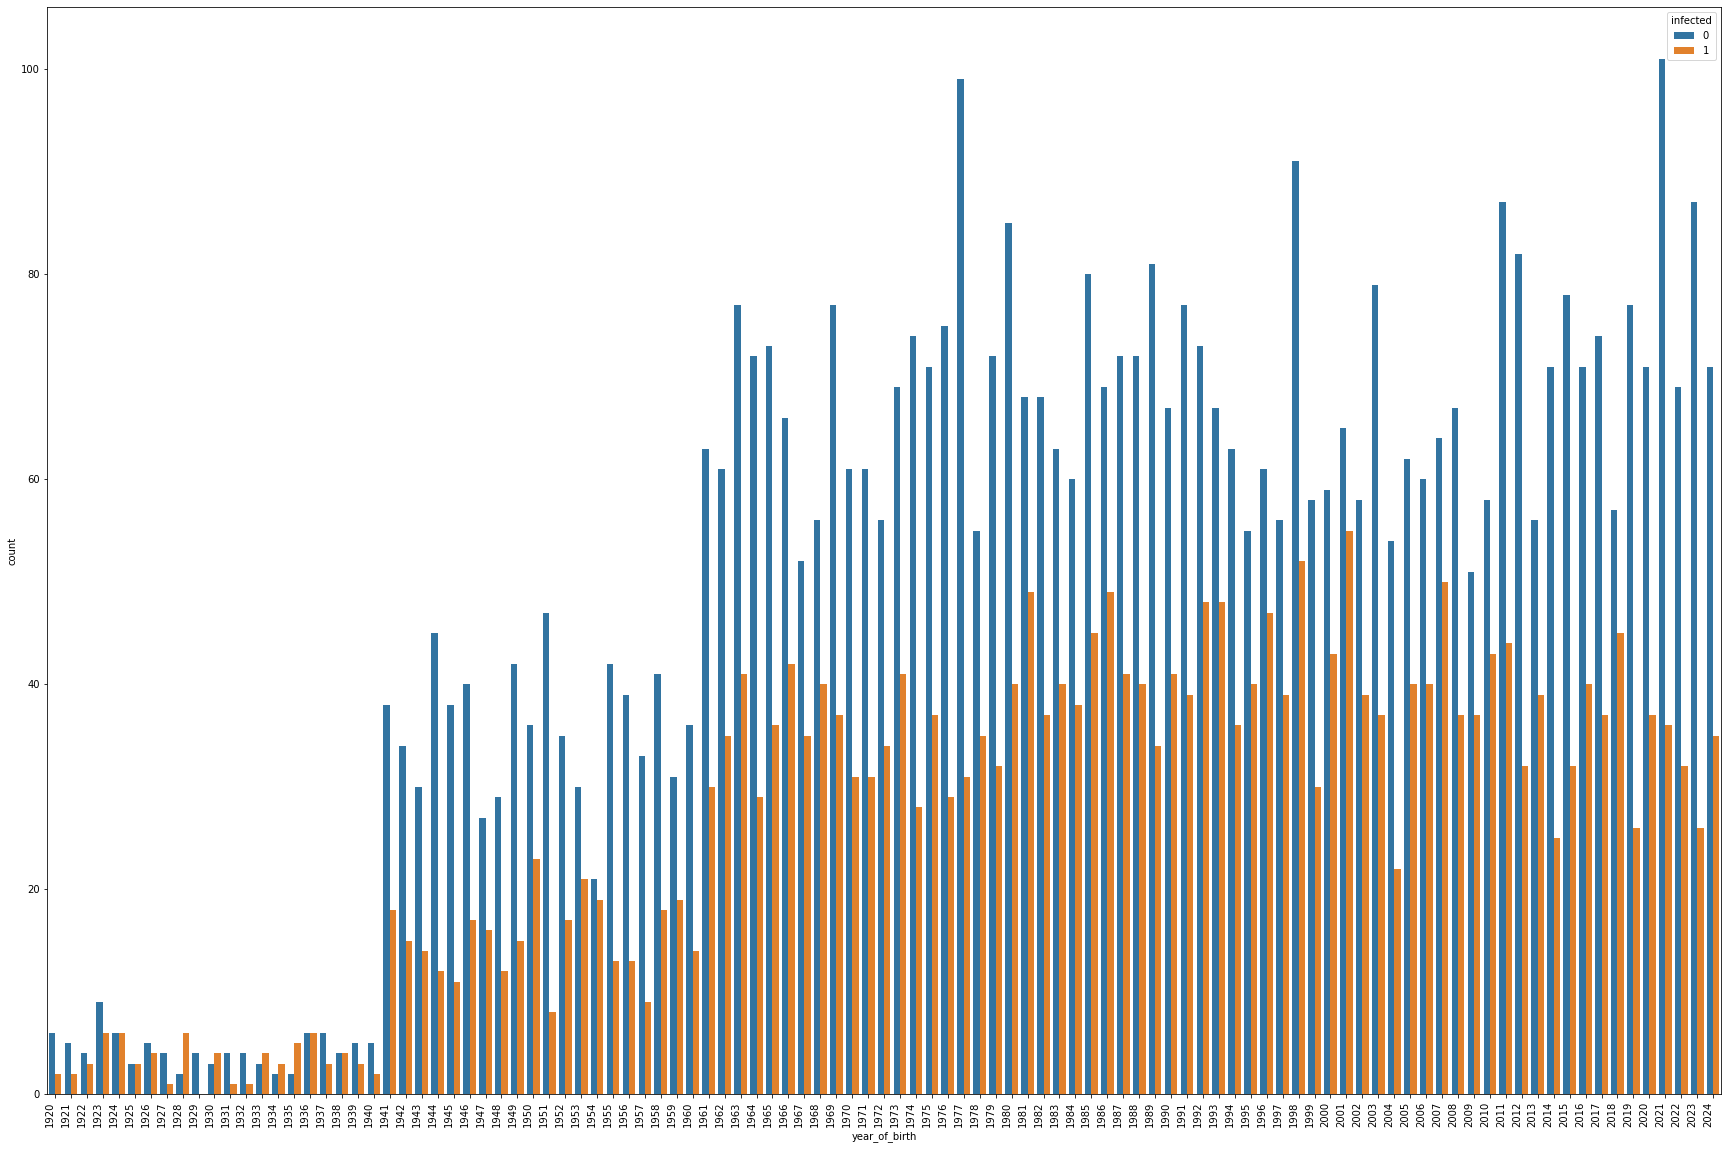

In [836]:
plt.figure(figsize = (30,20))
chart = sns.countplot(x = 'year_of_birth', hue='infected', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
print()

In [837]:
cols_remove = ['hours_worked_each_week', 'full_name']

In [838]:
df = df.drop(columns = cols_remove)

In [839]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                            'percent_zero': df.isin([0]).sum() * 100 / len(df),
                            'percent_none': df.isin(['None']).sum() * 100 / len(df),
                            'percent_qmark': df.isin(['?']).sum() * 100 / len(df)
                           } )
    return null_df

In [840]:
check_null_values(df)

,columns,percent_null,percent_zero,percent_none,percent_qmark
gender,gender,0.0,0.0000,0.0,0.0
year_of_birth,year_of_birth,0.0,0.0000,0.0,0.0
weight,weight,0.0,0.0000,0.0,0.0
height,height,0.0,0.0000,0.0,0.0
eye_color,eye_color,0.0,0.0000,0.0,0.0
race,race,0.0,0.0000,0.0,0.0
accommodation_type,accommodation_type,0.0,0.0000,0.0,0.0
education_status,education_status,0.0,0.0000,0.0,0.0
blood_type,blood_type,0.0,0.0000,0.0,0.0
family_members_count,family_members_count,0.0,0.0000,0.0,0.0


In [841]:
num_cols = df._get_numeric_data().columns
num_cols = [x for x in num_cols if x != 'infected']
print("Number of numerical fields:", len(num_cols))
num_cols

Number of numerical fields: 7


['year_of_birth',
 'weight',
 'height',
 'family_members_count',
 'avg_sleep_hours',
 'daily_household_water_usage',
 'fast_food_meals_per_month']

In [842]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Number of categorical fields:", len(cat_cols))
cat_cols

Number of categorical fields: 19


Index(['gender', 'eye_color', 'race', 'accommodation_type', 'education_status',
       'blood_type', 'occupation', 'living_area', 'sports_engagement',
       'favorite_music_genre', 'favorite_color', 'owned_car_brand',
       'owns_a_pet', 'has_health_insurance', 'has_cancer', 'smokes',
       'has_alzheimers', 'facial_hair', 'diet_type'],
      dtype='object')

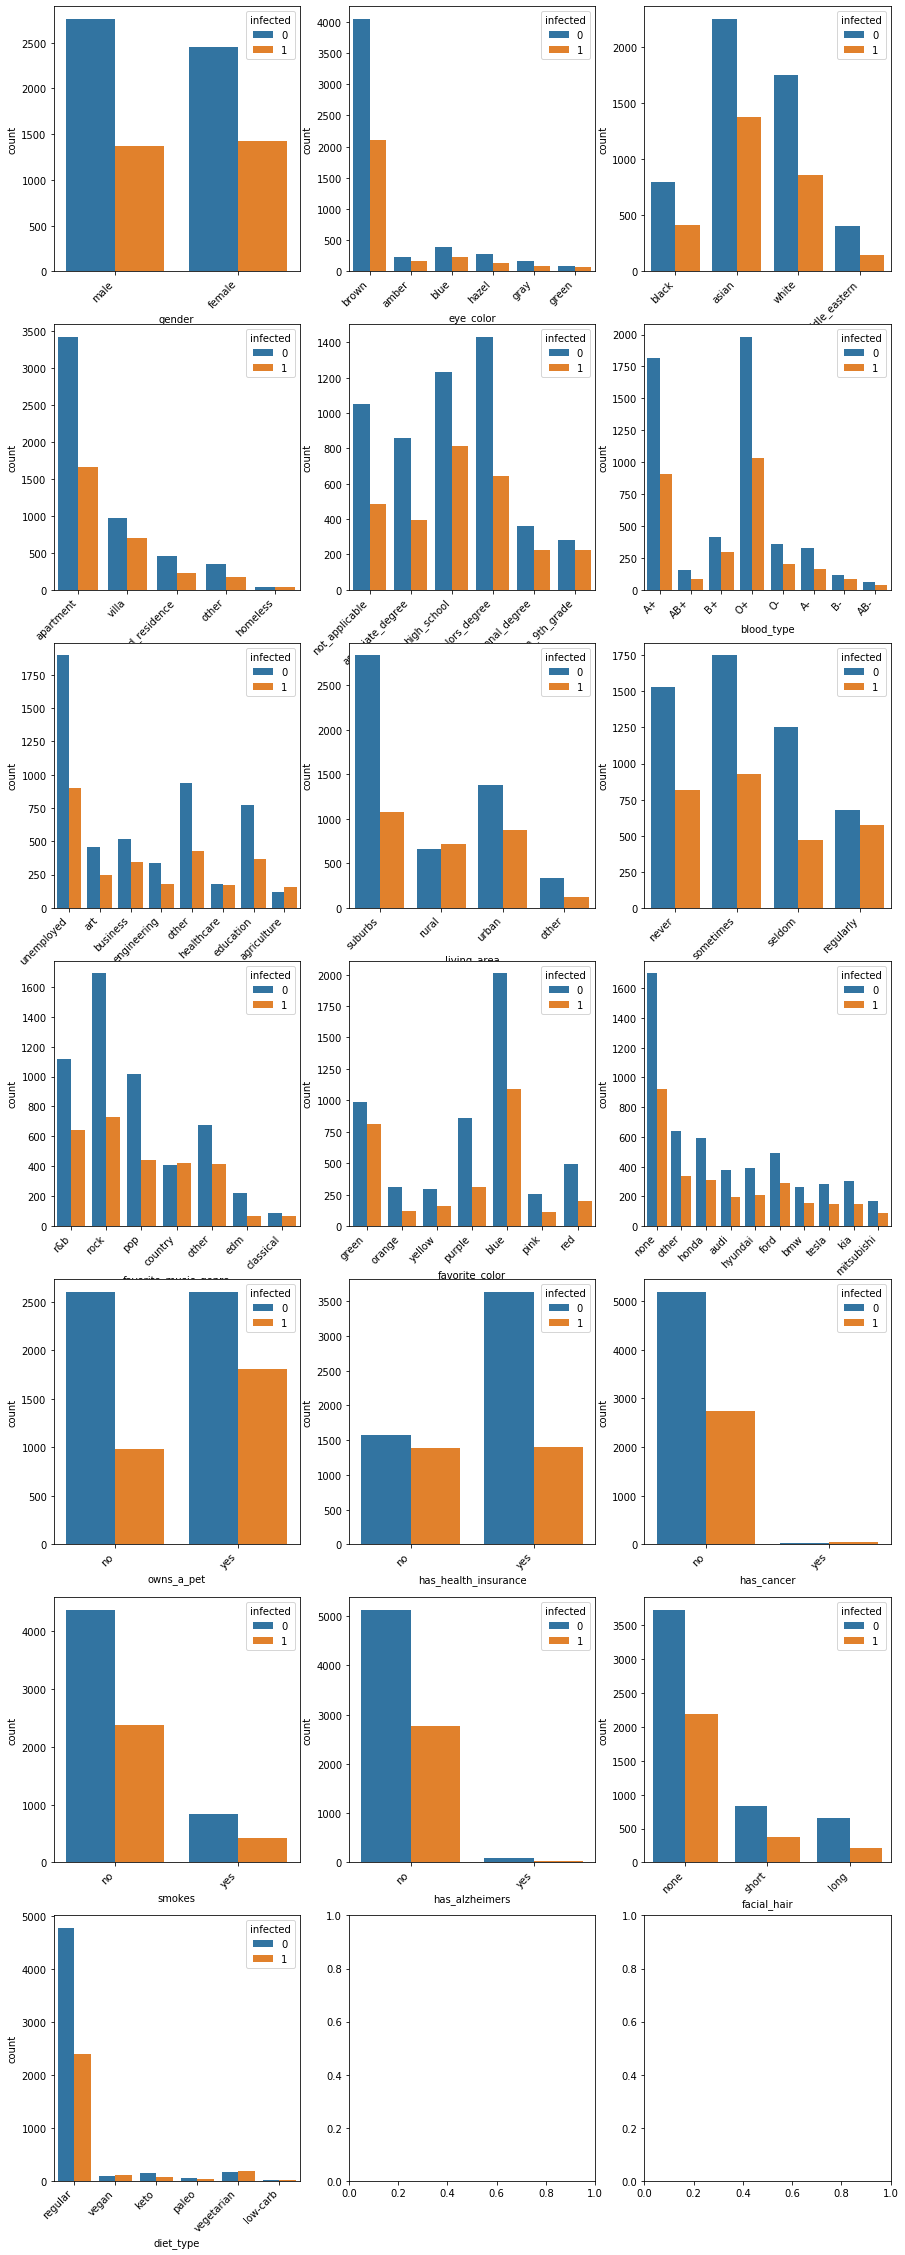

In [843]:
fig, axes = plt.subplots(7, 3, figsize=(15, 40))
for row in range(7):
    for col in range(3):
        if row*3+col < len(cat_cols):
            field_name = cat_cols[row*3+col]
            chart = sns.countplot(x = field_name, hue='infected', data = df, ax = axes[row, col])
            chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

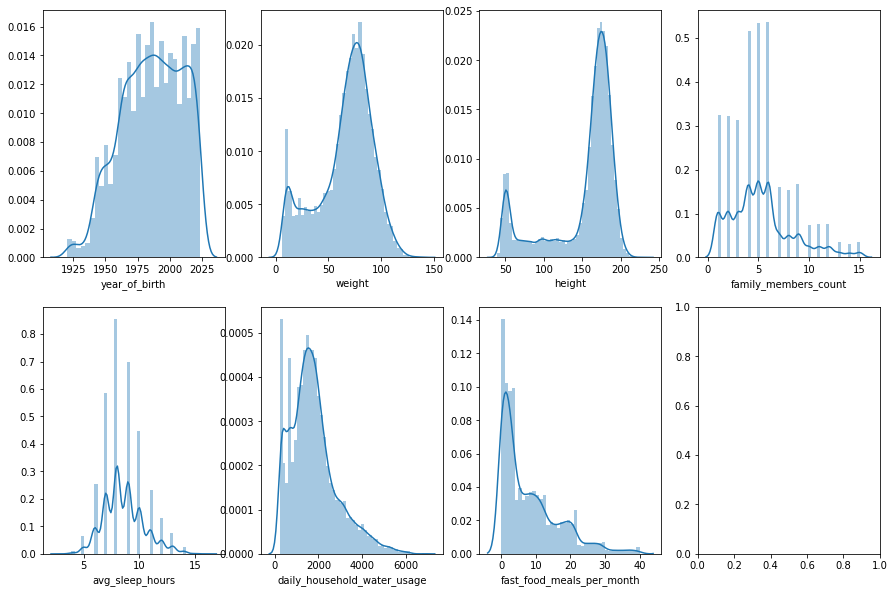

In [858]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
for row in range(2):
    for col in range(4):
        if row*4+col < len(num_cols):
            field_name = num_cols[row*4+col]
            chart = sns.distplot(df[field_name], ax = axes[row, col])
#             chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [862]:
num_cols

['year_of_birth',
 'weight',
 'height',
 'family_members_count',
 'avg_sleep_hours',
 'daily_household_water_usage',
 'fast_food_meals_per_month',
 'infected']

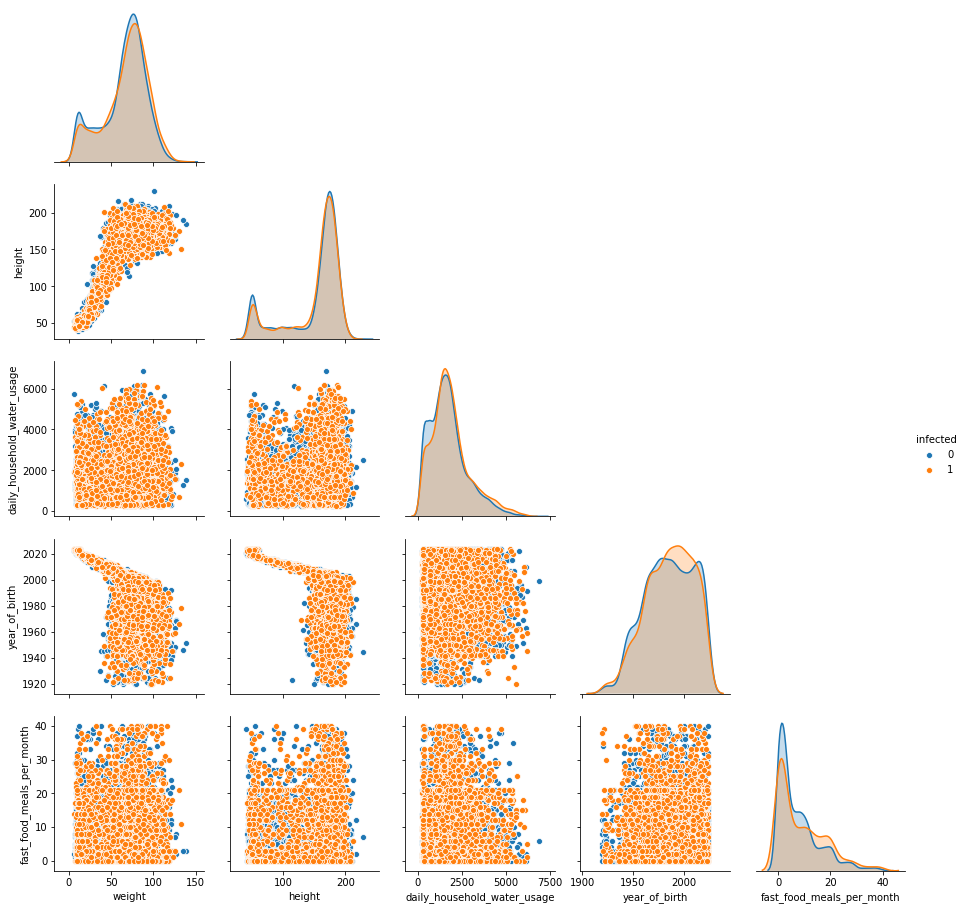

In [880]:
# plt.figure(figsize=(20,5))
g = df.copy()

sns.pairplot(data=df[['weight', 'height', 'daily_household_water_usage', 'year_of_birth', \
                      'fast_food_meals_per_month','infected']]\
             , hue='infected', corner=True)

In [80]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

family_members_count         daily_household_water_usage    0.973117
weight                       height                         0.849937
year_of_birth                height                         0.691596
                             weight                         0.669028
height                       avg_sleep_hours                0.618517
weight                       avg_sleep_hours                0.561936
year_of_birth                avg_sleep_hours                0.442178
family_members_count         infected                       0.080682
fast_food_meals_per_month    infected                       0.080628
daily_household_water_usage  infected                       0.072015
weight                       infected                       0.052181
height                       infected                       0.018808
family_members_count         fast_food_meals_per_month      0.014061
daily_household_water_usage  fast_food_meals_per_month      0.013008
year_of_birth                infec

In [771]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[num_cols] =  ss.fit_transform(df[num_cols])
df.head()

,has_cancer,has_health_insurance,smokes,has_alzheimers,daily_household_water_usage,diet_type,fast_food_meals_per_month,infected
0,no,no,no,no,-0.294115,regular,2,0
1,no,no,no,no,0.169637,regular,0,0
2,no,no,no,yes,-1.324764,regular,16,0
3,no,yes,no,no,-0.223029,regular,1,1
4,no,yes,no,no,-1.329127,regular,12,0


In [772]:
X = df.drop(['infected'], 1)
y = df.infected
print(X.shape, y.shape)

(8000, 7) (8000,)


In [773]:

def expanding_mean(df_test, col):
    cumsum   = df.groupby(col)['infected'].cumsum() - df['infected']
    cumcnt = df_test.groupby(col).cumcount()
    df_test[col + '_mean'] = cumsum/cumcnt
    df_test[col + '_mean'] = df_test[col + '_mean'].replace([np.inf, -np.inf], np.nan)
    df_test[col + '_mean'].fillna(0.3343, inplace=True)
    return df_test

for col in cat_cols:
    X = expanding_mean(X, col)

X.head()

,has_cancer,has_health_insurance,smokes,has_alzheimers,daily_household_water_usage,diet_type,fast_food_meals_per_month,has_cancer_mean,has_health_insurance_mean,smokes_mean,has_alzheimers_mean,diet_type_mean
0,no,no,no,no,-0.294115,regular,2,0.3343,0.3343,0.3343,0.334300,0.3343
1,no,no,no,no,0.169637,regular,0,0.0000,0.0000,0.0000,0.000000,0.0000
2,no,no,no,yes,-1.324764,regular,16,0.0000,0.0000,0.0000,0.334300,0.0000
3,no,yes,no,no,-0.223029,regular,1,0.0000,0.3343,0.0000,0.000000,0.0000
4,no,yes,no,no,-1.329127,regular,12,0.2500,1.0000,0.2500,0.333333,0.2500


In [774]:
X = pd.get_dummies(X, columns = cat_cols, drop_first=True)

In [775]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = y)
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_val.shape = {X_val.shape}')
print(f'y_val.shape = {y_val.shape}')

X_train.shape = (6400, 16)
y_train.shape = (6400,)
X_val.shape = (1600, 16)
y_val.shape = (1600,)


In [776]:
X_train.head()

,daily_household_water_usage,fast_food_meals_per_month,has_cancer_mean,has_health_insurance_mean,smokes_mean,has_alzheimers_mean,diet_type_mean,has_cancer_yes,has_health_insurance_yes,smokes_yes,has_alzheimers_yes,diet_type_low-carb,diet_type_paleo,diet_type_regular,diet_type_vegan,diet_type_vegetarian
7514,1.755578,28,0.348223,0.471732,0.354278,0.353306,0.337249,0,0,0,0,0,0,1,0,0
6679,-0.837678,2,0.345364,0.278622,0.351601,0.350494,0.335282,0,1,0,0,0,0,1,0,0
2601,2.338306,3,0.358696,0.288971,0.340483,0.362466,0.345006,0,1,1,0,0,0,1,0,0
7726,-1.075586,17,0.347162,0.278143,0.331137,0.352100,0.335360,0,1,1,0,0,0,1,0,0
2557,-0.247902,0,0.358215,0.289474,0.365753,0.361905,0.344919,0,1,0,0,0,0,1,0,0


In [777]:
X_val.head()

,daily_household_water_usage,fast_food_meals_per_month,has_cancer_mean,has_health_insurance_mean,smokes_mean,has_alzheimers_mean,diet_type_mean,has_cancer_yes,has_health_insurance_yes,smokes_yes,has_alzheimers_yes,diet_type_low-carb,diet_type_paleo,diet_type_regular,diet_type_vegan,diet_type_vegetarian
3419,-0.086488,9,0.353410,0.287175,0.349328,0.357779,0.341134,0,1,1,0,0,0,1,0,0
1541,0.427355,0,0.354944,0.488971,0.358108,0.356579,0.339623,0,0,0,0,0,0,1,0,0
5398,-0.595193,8,0.346168,0.470588,0.351631,0.351458,0.335540,0,0,0,0,0,0,1,0,0
3160,-1.343718,1,0.355158,0.286432,0.360327,0.359230,0.342928,0,1,0,0,0,0,1,0,0
820,-0.483171,10,0.348522,0.274102,0.356835,0.352217,0.337398,0,1,0,0,0,0,1,0,0


In [778]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [779]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [780]:
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_val)[None, :])

In [781]:
predictions = np.vstack(predictions)

In [782]:
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]

In [783]:
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_val, np.argmax(pred, axis=1)))

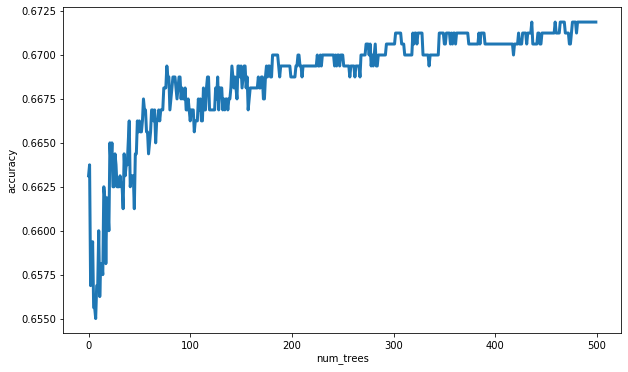

In [784]:
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy');

In [665]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

KeyboardInterrupt: 

In [460]:
# fit the model on the whole dataset
model = XGBClassifier()
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_val)
print('Accuracy: %.3f' % (accuracy_score(yhat, y_val)))

Accuracy: 0.682


In [461]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.716 (0.009)


In [462]:
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X_train, y_train)
# make a single prediction
yhat = model.predict(X_val)
print('Accuracy: %.3f' % (accuracy_score(yhat, y_val)))

Accuracy: 0.693


In [785]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'n_estimators': [50, 70, 100, 150, 200]}

In [792]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = LGBMClassifier(max_depth=-1, random_state=10, silent=True, metric='accuracy', n_jobs=1, n_estimators=150)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='accuracy',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [796]:
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score reached: 0.6700015217349596 with params: {'colsample_bytree': 0.5912347387847595, 'min_child_samples': 321, 'min_child_weight': 1e-05, 'n_estimators': 50, 'num_leaves': 9, 'reg_alpha': 5, 'reg_lambda': 5, 'subsample': 0.28755441437275425} 


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   41.6s finished


In [794]:
clf_sw = LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**gs.best_params_)
clf_sw.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.5912347387847595, importance_type='split',
               learning_rate=0.1, max_depth=40, metric='accuracy',
               min_child_samples=321, min_child_weight=1e-05,
               min_split_gain=0.0, n_estimators=50, n_jobs=1, num_leaves=9,
               objective=None, random_state=314, reg_alpha=5, reg_lambda=5,
               silent=True, subsample=0.28755441437275425,
               subsample_for_bin=200000, subsample_freq=0)

In [795]:
y_hat = clf_sw.predict(X_val)
accuracy_score(y_hat, y_val)

0.675

In [791]:
def get_test_df():
    df_test = pd.read_csv("test.csv")
    df_test.drop(cols_remove, axis = 1, inplace=True)
    df_test[num_cols] = ss.transform(df_test[num_cols])
    for col in cat_cols:
        df_test = expanding_mean(df_test, col)
    df_test =  pd.get_dummies(df_test, columns = cat_cols, drop_first=True)
    return df_test

In [753]:
df_test = get_test_df()

In [754]:
df_test.head()

,family_members_count,avg_sleep_hours,daily_household_water_usage,fast_food_meals_per_month,gender_mean,blood_type_mean,occupation_mean,living_area_mean,sports_engagement_mean,owns_a_pet_mean,...,owns_a_pet_yes,has_health_insurance_yes,has_cancer_yes,smokes_yes,has_alzheimers_yes,diet_type_low-carb,diet_type_paleo,diet_type_regular,diet_type_vegan,diet_type_vegetarian
0,0.899578,0.220356,0.741821,-0.375782,0.3343,0.3343,0.3343,0.3343,0.3343,0.3343,...,0,1,0,1,0,0,0,1,0,0
1,-0.735646,0.220356,-0.784473,-0.613140,0.3343,0.3343,0.3343,0.3343,0.0000,0.0000,...,0,1,1,0,0,0,0,1,0,0
2,0.245488,-1.455885,-0.127797,-0.731820,0.0000,0.3343,0.0000,0.3343,0.3343,0.0000,...,0,0,0,1,0,0,0,1,0,0
3,-1.062691,0.220356,-1.170762,1.048366,0.0000,0.0000,0.3343,0.0000,0.0000,0.0000,...,0,1,0,0,0,0,0,1,0,0
4,1.226622,-0.338391,1.364898,-0.375782,0.0000,0.0000,0.3343,0.0000,0.0000,0.3343,...,1,1,0,0,0,0,0,1,0,0


In [755]:
y_pred = clf_sw.predict(df_test)
sum(y_pred)/len(y_pred)

0.3215

In [708]:
def save_df(y_pred):
    out_df=pd.DataFrame(y_pred, columns= ['prediction'])
    out_df.index.names = ['id']
    out_df.index += 1 
    out_df.to_csv('out.csv')

In [709]:
save_df(y_pred)

In [710]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfc = LGBMClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=-1,
                               min_child_samples=20, min_child_weight=0.001,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=1.0, subsample_for_bin=200000,
                               subsample_freq=0),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [711]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 85


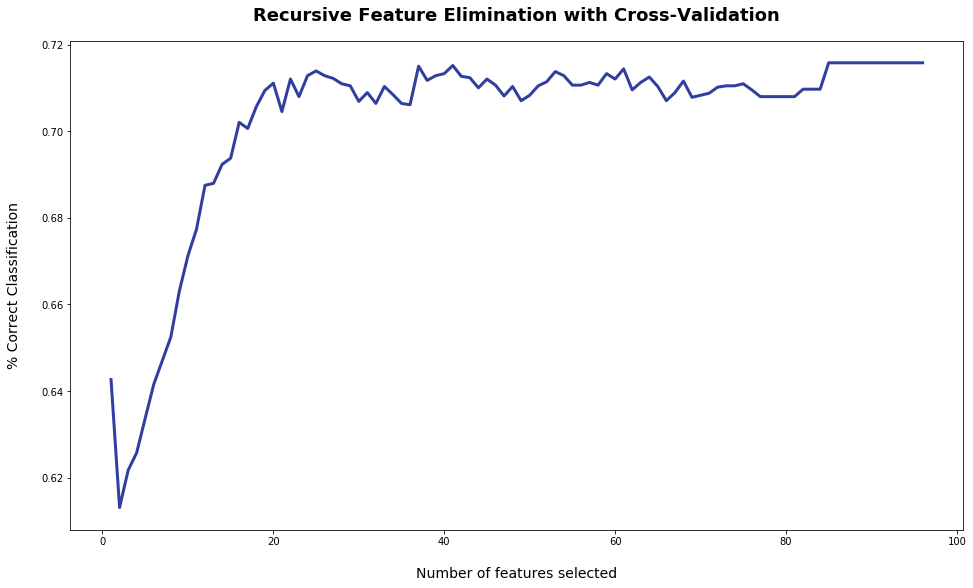

In [712]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [713]:
X_rfe = rfecv.transform(X)

In [714]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_rfe, y, test_size=0.2, stratify = y)
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_val.shape = {X_val.shape}')
print(f'y_val.shape = {y_val.shape}')

X_train.shape = (6400, 85)
y_train.shape = (6400,)
X_val.shape = (1600, 85)
y_val.shape = (1600,)


In [715]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
clf = LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='accuracy', n_jobs=1, n_estimators=150)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='accuracy',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [716]:
fit_params={"eval_metric" : 'accuracy', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [717]:
gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.4min finished


Best score reached: 0.731719957414855 with params: {'colsample_bytree': 0.6433117836032942, 'min_child_samples': 224, 'min_child_weight': 1e-05, 'n_estimators': 200, 'num_leaves': 7, 'reg_alpha': 1, 'reg_lambda': 20, 'subsample': 0.27963305897119684} 


In [718]:
clf_sw = LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**gs.best_params_)
clf_sw.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.6433117836032942, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='accuracy',
               min_child_samples=224, min_child_weight=1e-05,
               min_split_gain=0.0, n_estimators=200, n_jobs=1, num_leaves=7,
               objective=None, random_state=314, reg_alpha=1, reg_lambda=20,
               silent=True, subsample=0.27963305897119684,
               subsample_for_bin=200000, subsample_freq=0)

In [719]:
y_hat = clf_sw.predict(X_val)
accuracy_score(y_hat, y_val)

0.71875

In [720]:
X_test_rfe = rfecv.transform(df_test)

In [721]:
y_pred = clf_sw.predict(X_test_rfe)
sum(y_pred)/len(y_pred)

0.397

In [722]:
save_df(out_df)